In [1]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

data_path = '../data/train.csv'
df = pd.read_csv(data_path)

In [3]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dty

In [4]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
                 id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000    


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


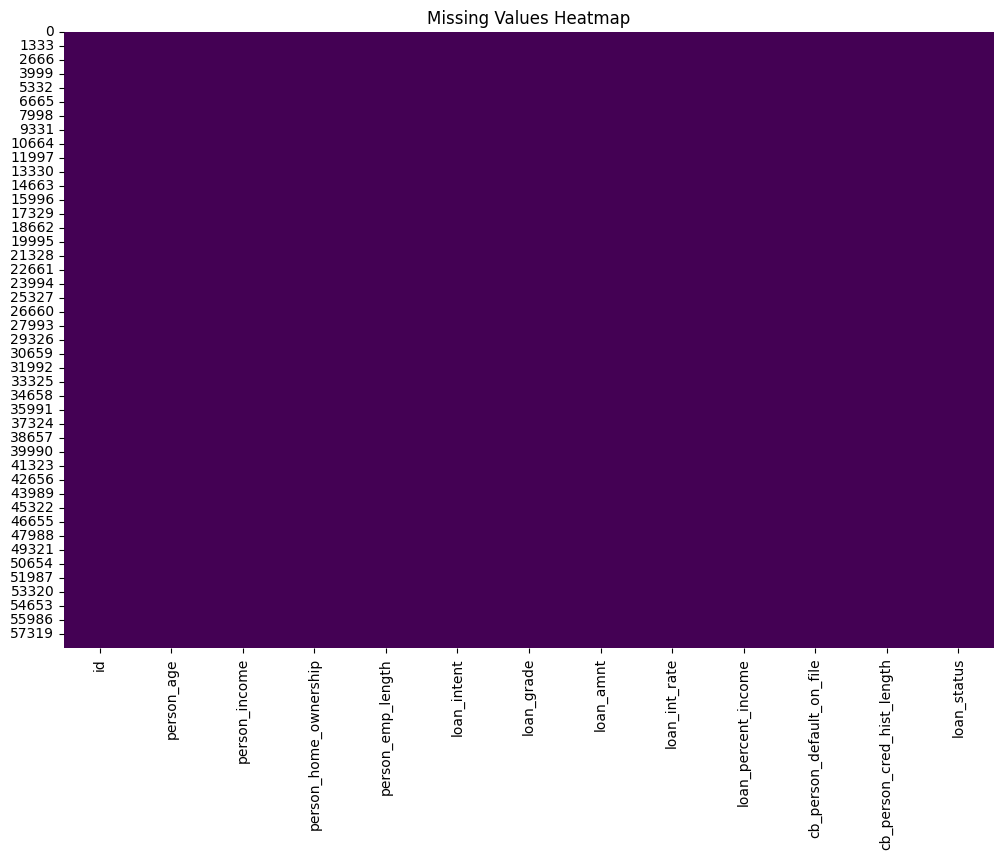

In [5]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

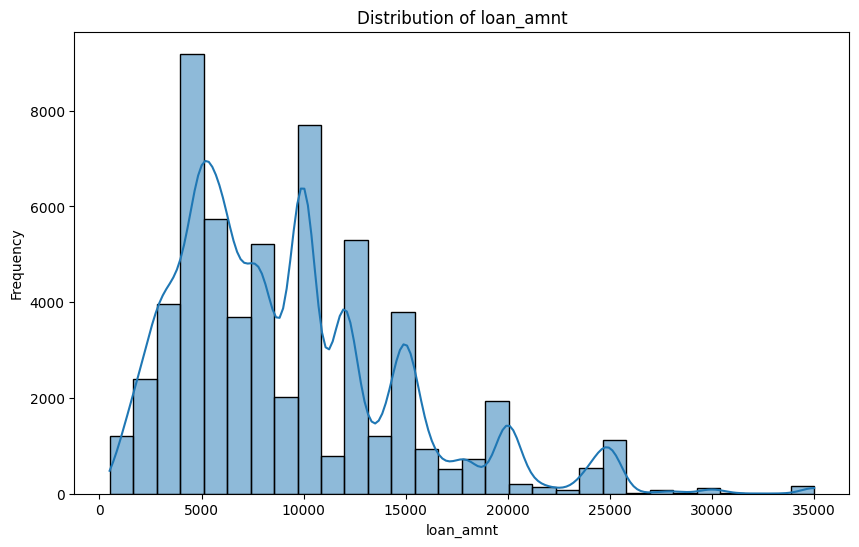

In [6]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'loan_amnt')

c:\Users\sushant\Documents\GitHub\Kaggle_Competation\Loan Approval Prediction\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


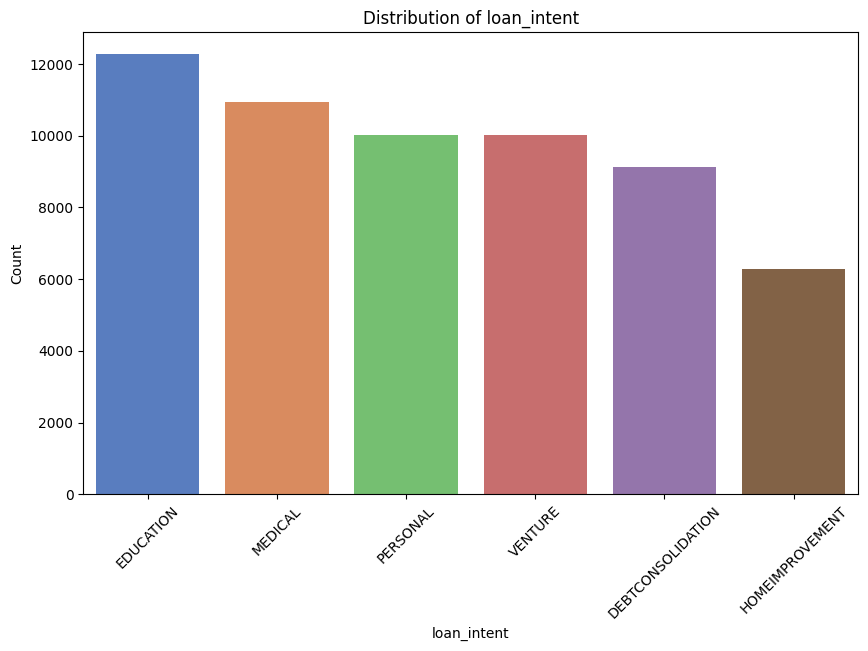

In [7]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'loan_intent')


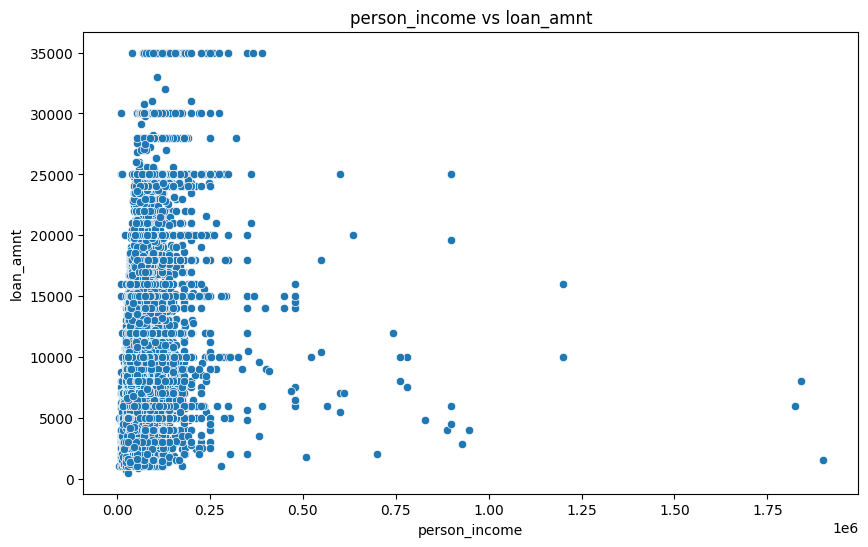

In [8]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'person_income', 'loan_amnt')


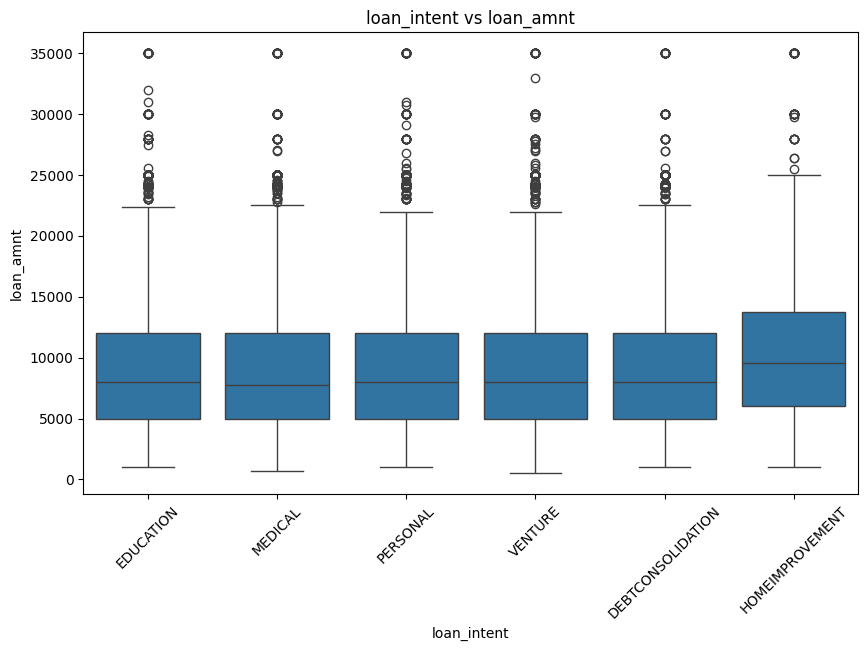

In [9]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'loan_intent', 'loan_amnt')

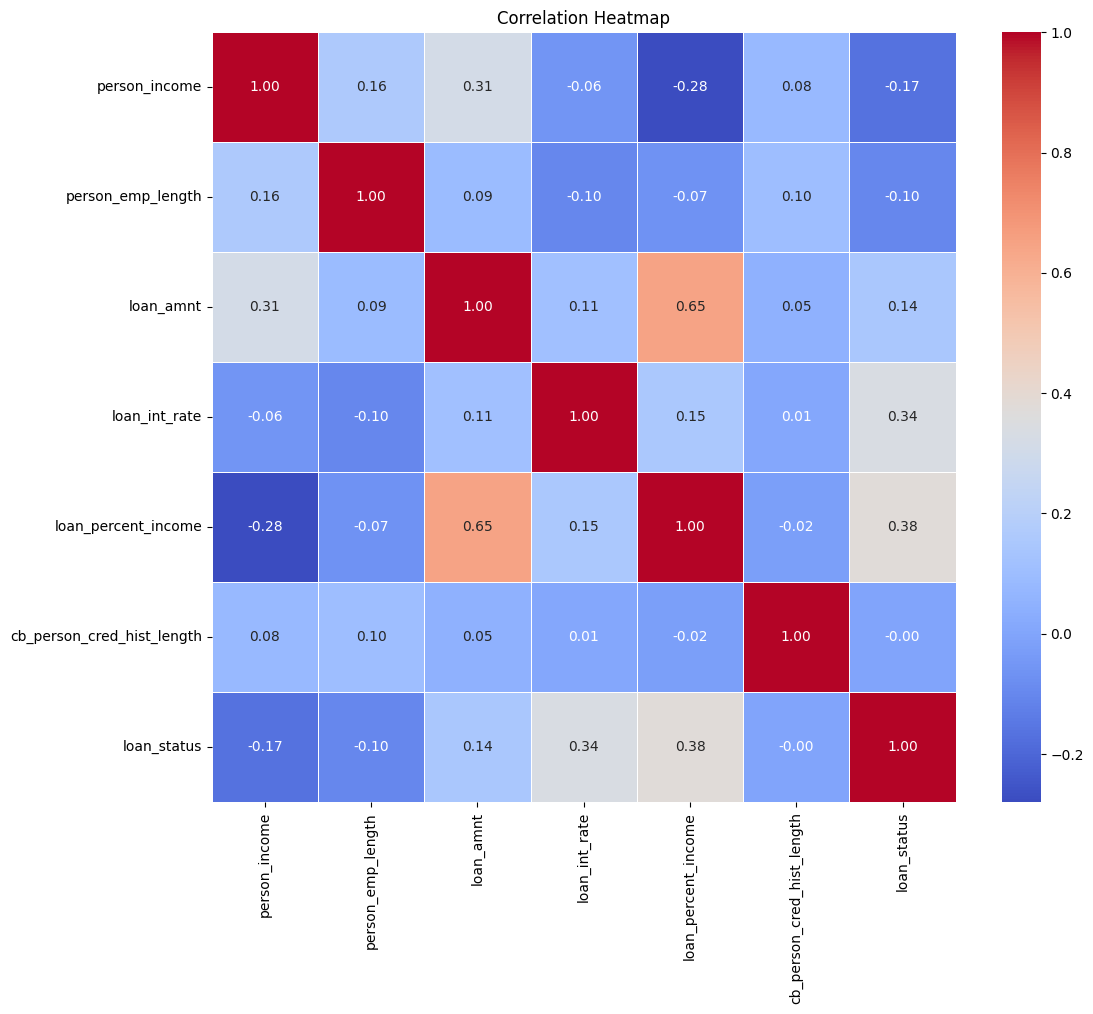

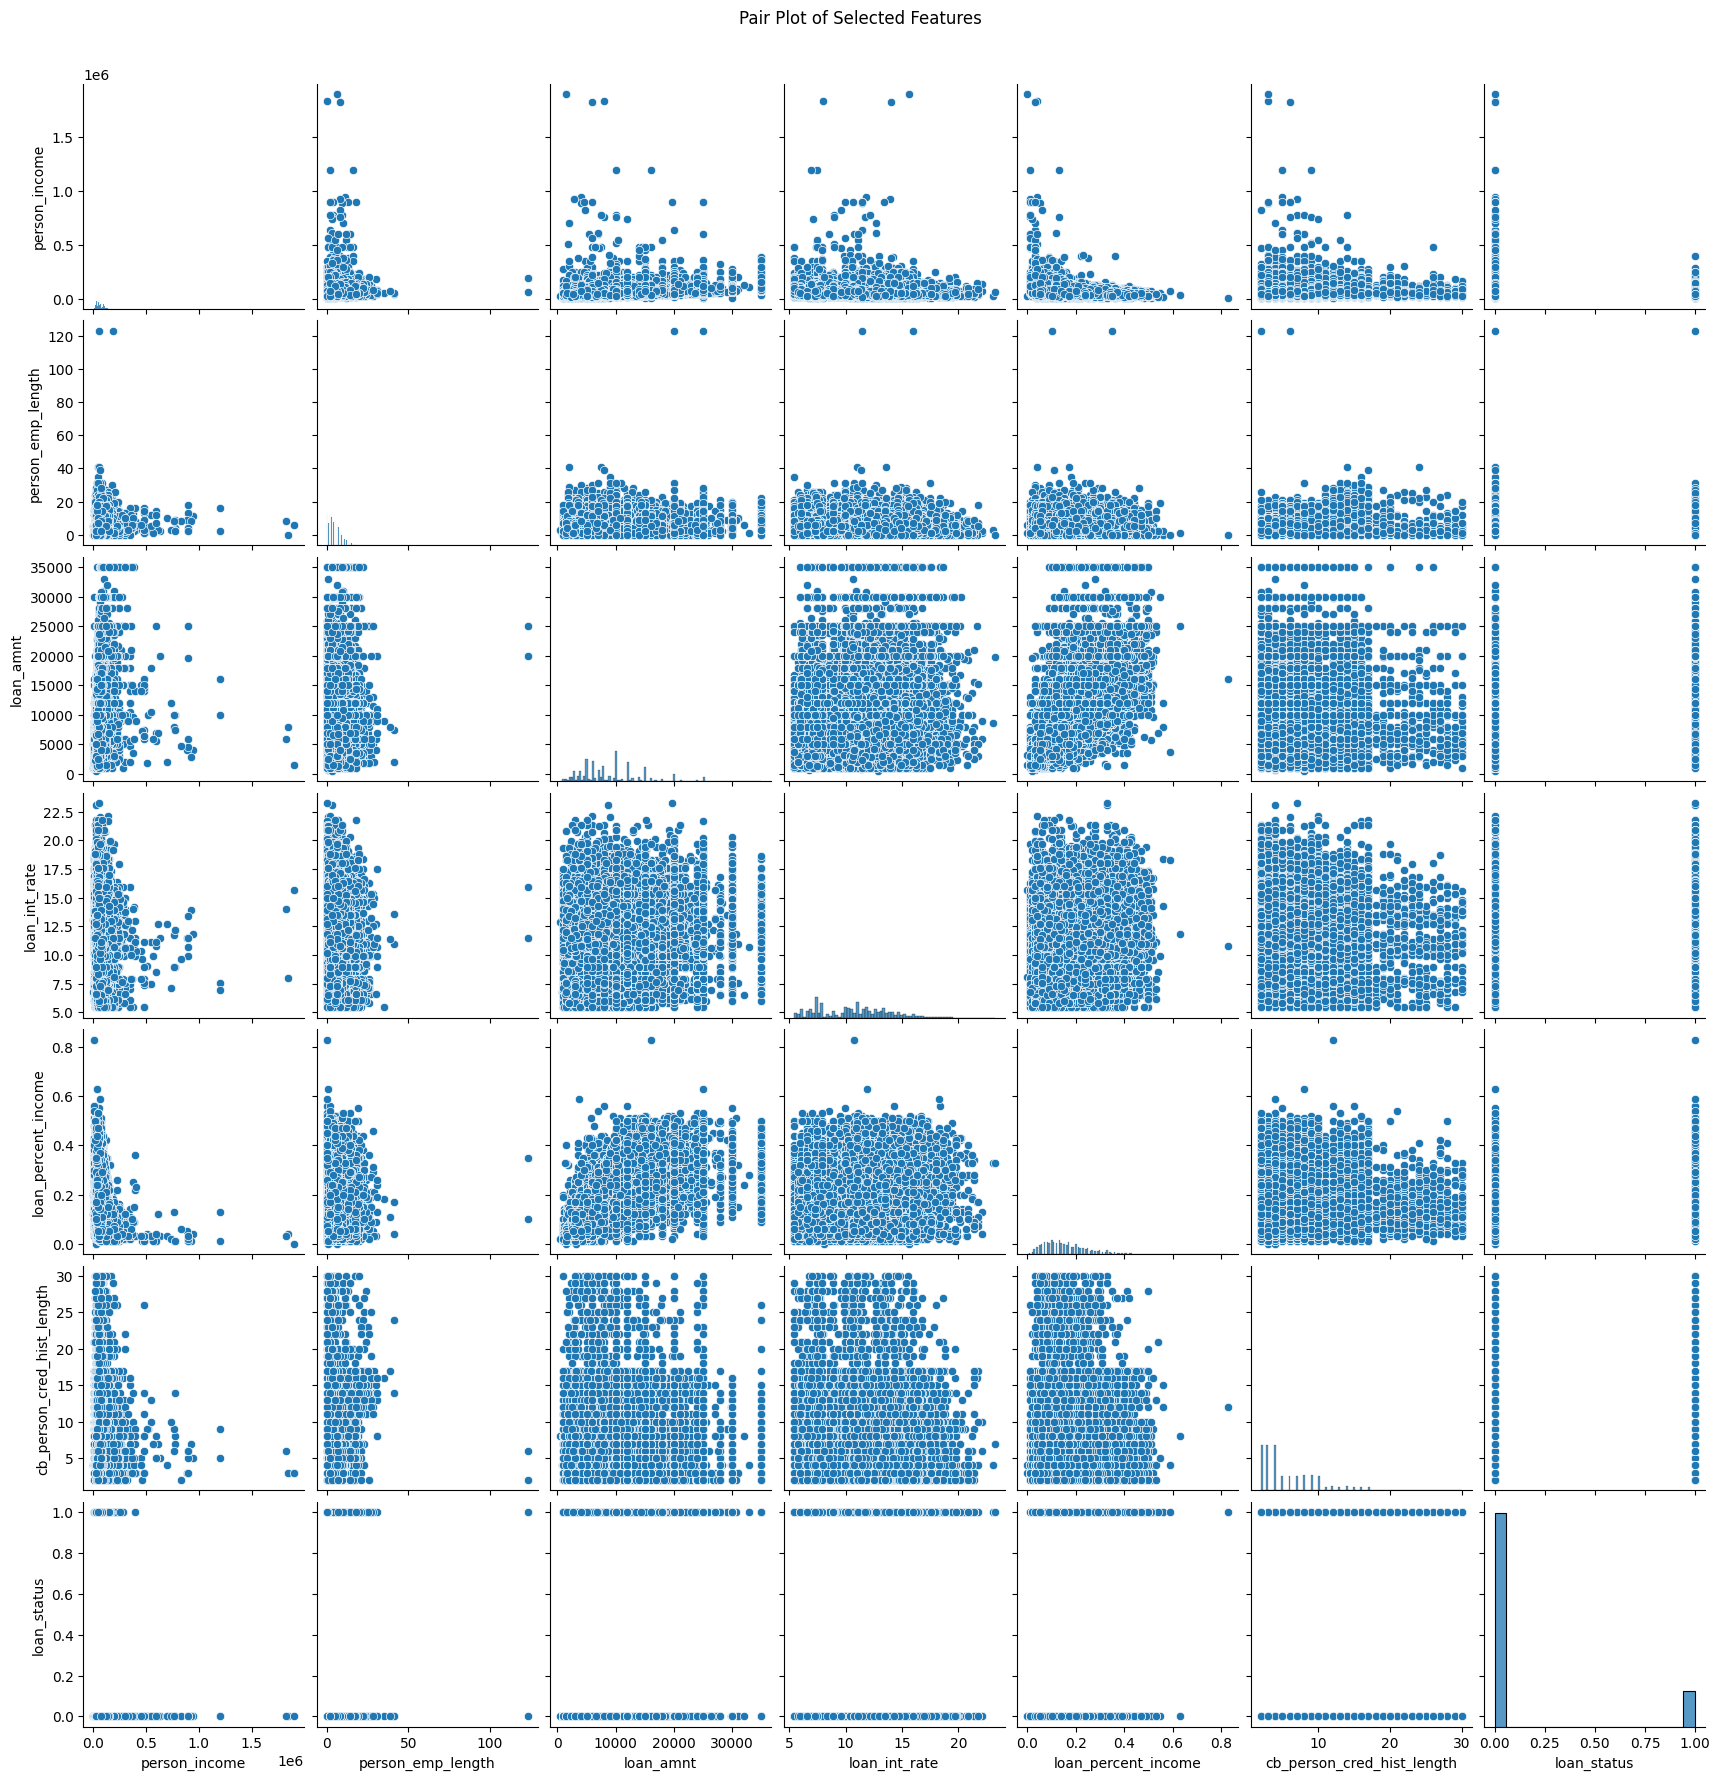

In [10]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['person_income', 'person_emp_length', 'loan_amnt',  'loan_int_rate',  'loan_percent_income', 'cb_person_cred_hist_length',  'loan_status']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore ConvergenceWarning 
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load training and test datasets
train_data = pd.read_csv(data_path)
data_path_1 = '../data/test.csv'
test_data = pd.read_csv(data_path_1)

# Separate features and target from the training data
X_train = train_data.drop(columns=['loan_status', 'id'])
y_train = train_data['loan_status']

# Use the same features from the test data
X_test = test_data.drop(columns=['id'])
test_ids = test_data['id']  # Save the ids for the submission file

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessors for each pipeline
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])

# Define various pipelines for comparison

# Simplest Model (No polynomial features, No PCA)
simple_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

# Model with interaction terms + PCA
interaction_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('pca', PCA(n_components=0.95)),
    ('logreg', LogisticRegression())
])

# Model with all quadratic terms + PCA
quadratic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('pca', PCA(n_components=0.95)),
    ('logreg', LogisticRegression())
])

# Model with all cubic terms + PCA
cubic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('pca', PCA(n_components=0.95)),
    ('logreg', LogisticRegression())
])

# List of all pipelines for comparison
all_pipelines = [
    (simple_pipeline, 'Simplest Model (no interaction terms, no PCA)'), 
    (interaction_pipeline, 'Model with only interaction terms + PCA'),   
    (quadratic_pipeline, 'Model with all quadratic terms + PCA'), 
    (cubic_pipeline, 'Model with all cubic terms + PCA')
]

# Compare performance across pipelines using cross-validation
for pipeline, label in all_pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"{label} - Mean Accuracy: {scores.mean():.4f} - Std: {scores.std():.4f}")

# Train the best pipeline (you can choose based on results) on the full training data
best_pipeline = simple_pipeline  # Replace with the best-performing pipeline
best_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_pipeline.predict(X_test)

# Create a DataFrame with the submission format
submission = pd.DataFrame({
    'id': test_ids,
    'loan_status': y_pred
})

# Save to submission.csv
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully.")


Simplest Model (no interaction terms, no PCA) - Mean Accuracy: 0.9120 - Std: 0.0011
Model with only interaction terms + PCA - Mean Accuracy: 0.9279 - Std: 0.0025
Model with all quadratic terms + PCA - Mean Accuracy: 0.9007 - Std: 0.0043
Model with all cubic terms + PCA - Mean Accuracy: 0.8576 - Std: 0.0000
Submission file created successfully.
